In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import pyBigWig
import numpy as np

In [3]:
ez=pd.read_csv('data/ez.csv',index_col=0,engine='c')
exp=pd.read_csv('data/exp.csv',index_col=0,engine='c')

In [4]:
#h=pd.read_csv('data/h.csv',index_col=0,engine='c')
#ez=ez.merge(h,left_index=True,right_index=True)

In [ ]:
df=pd.read_csv('data/meth/t4_all.csv',index_col=0)
df.shape

In [ ]:
fs=[c.strip('.meth') for c in df.columns]
df.columns=fs

In [6]:
ind=pd.read_csv('data/ind.csv',index_col=0,engine='c')
df=df.merge(ind[['d','gene']],left_index=True,right_index=True)
#ind=ind.merge(ez,left_index=True, right_index=True)

NameError: name 'df' is not defined

<AxesSubplot:>

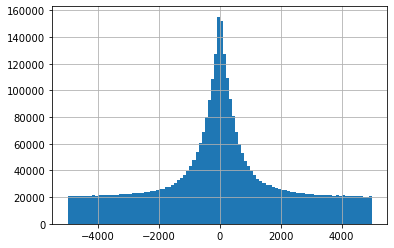

In [7]:
df.d.hist(bins=100)

(2213449, 4)


<AxesSubplot:>

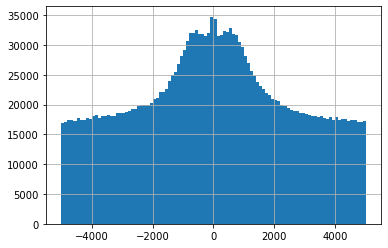

In [8]:
df['s']=df[fs].sum(1)
df=df[df.s>0]
df=df[df.s<len(fs)]
df=df.drop('s',axis=1).round(3)
print(df.shape)
df.d.hist(bins=100)

In [36]:
neo=pd.read_csv('data/neo.csv',index_col=0)

In [47]:
neo=neo.merge(ind[['d','gene']],left_index=True,right_index=True)

In [78]:
neo=neo[neo.d.abs()<500]
len(neo)

1096435

In [69]:
cs=neo.groupby('gene').size()

In [72]:
cs=cs[cs>10]

In [99]:
neo=neo[neo.gene.isin(cs.index)]
len(neo)

1084822

In [101]:
neo=neo.merge(exp['e_blood'],left_index=True,right_index=True)
len(neo)

1084822

In [188]:
neo=neo.merge(ez,left_index=True,right_index=True)
len(neo)

1084822

In [189]:
dg=neo.groupby('gene').mean()

In [190]:
me=dg[dg.neo>.8]

In [191]:
me.e_blood.quantile(.9)

1.625351000000004

In [192]:
um=dg[dg.neo<.2]

In [193]:
um.e_blood.quantile(.5)

2.91638

<AxesSubplot:>

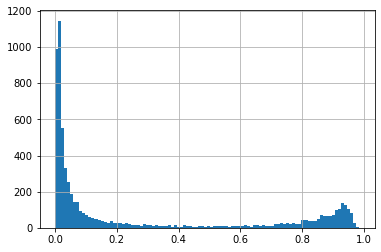

In [194]:
dg[dg.e_blood<1].neo.hist(bins=100)